In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [14]:
train = pd.read_csv("train_oil.csv")
test = pd.read_csv("oil_test.csv")

# Выводим форму датасетов, чтобы понять количество строк и столбцов
print(f"Train: {train.shape}")
print(f"Test : {test.shape}")

Train: (309, 20)
Test : (133, 19)


In [15]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [16]:
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [17]:
train.info()
train.describe()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [18]:
df_nan = train.loc[:, train.isnull().any()]
# посмотрим процент пропущенных значений
df_nan.isnull().sum() / len(df_nan) * 100

Country        8.737864
Region        12.297735
Basin name    12.297735
Latitude       8.737864
Longitude      9.708738
dtype: float64

In [19]:
#Unknown — это лучше, чем удалять, и модели смогут извлечь из этого пользу.
for col in ['Country', 'Region', 'Basin name']:
    train[col] = train[col].fillna('Unknown')  # для train
    test[col] = test[col].fillna('Unknown')    # для test


In [21]:
# Числовые -> среднее
for col in ['Latitude', 'Longitude']:
    train[col] = train[col].fillna(train[col].mean())  # для train
    test[col] = test[col].fillna(train[col].mean())    # для test 

In [22]:
train.isnull().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

Исследуем целевую переменную


C:\Users\NikLeo\AppData\Local\Temp\ipykernel_13780\2778016544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Onshore/Offshore',


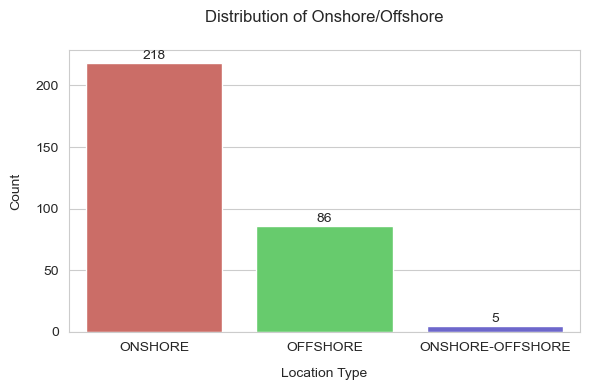

In [23]:
sns.set_style("whitegrid")  
plt.figure(figsize=(6, 4))  

ax = sns.countplot(x='Onshore/Offshore', 
                   data=train,  
                   palette='hls',
                   order=train['Onshore/Offshore'].value_counts().index)  # сортировка по частоте

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Настраиваем подписи
plt.title('Distribution of Onshore/Offshore', pad=20)  
plt.xlabel('Location Type', labelpad=10)  
plt.ylabel('Count', labelpad=10)  
plt.tight_layout()  

plt.show()

Переведем целевую переменную в числовой формат в соответствии с заданием.

In [24]:
off = {'ONSHORE': 1, 'OFFSHORE': 0, 'ONSHORE-OFFSHORE': 2}

train['Onshore/Offshore'] = train['Onshore/Offshore'].map(off)

In [62]:
# Список категориальных столбцов, которые нужно закодировать
categ = ['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology', 'Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name', 'Operator company']

# Создаем OrdinalEncoder, который заменит категории числами
# Если в тестовой выборке появятся неизвестные категории, они будут заменены на -1
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Обучаем encoder на тренировочных данных и сразу трансформируем train и test
train_encoded = encoder.fit_transform(train[categ])
test_encoded = encoder.transform(test[categ])

# Заменяем старые категориальные столбцы новыми закодированными
train[categ] = train_encoded
test[categ] = test_encoded

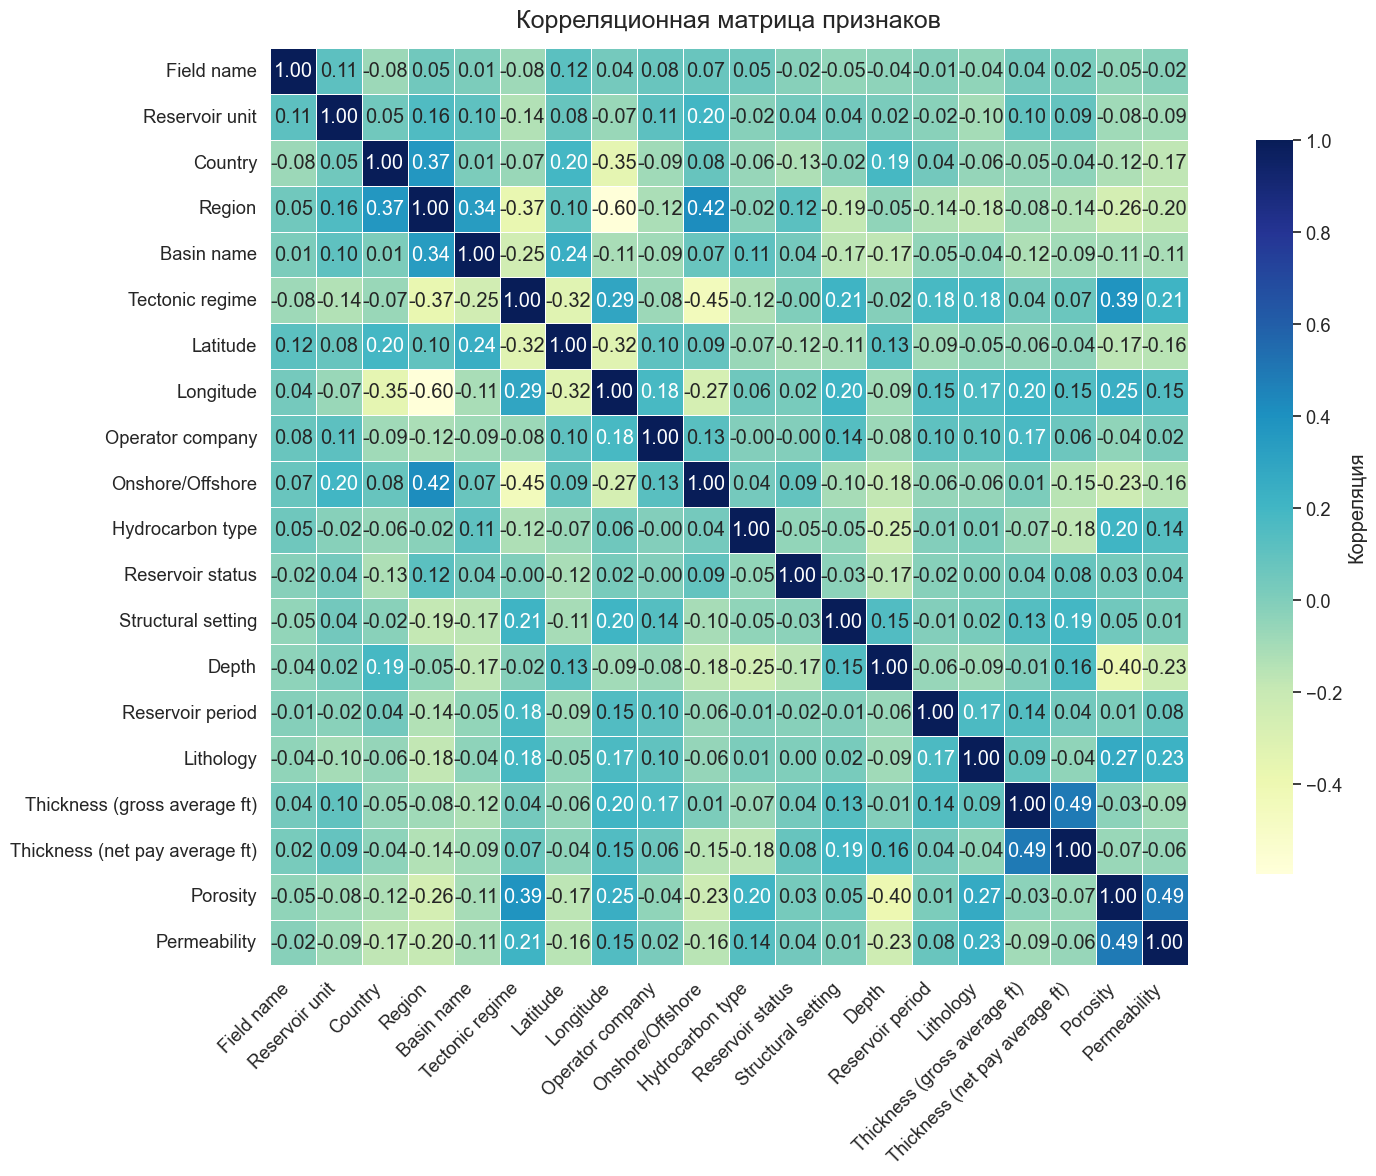

In [29]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 12))  # больше по ширине и чуть меньше по высоте

# Вычисление корреляционной матрицы только по числовым признакам
corr_matrix = train.corr(numeric_only=True)

# Построение тепловой карты
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Корреляция"},
    
)

# Заголовок и вывод
plt.title("Корреляционная матрица признаков", fontsize=18, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Region имеют заметную корреляцию (до 0.42)
Latitude коррелирует отрицательно
Porosity, Permeability, Thickness, Depth — слабо коррелируют с Onshore/Offshore

Разделим датафрейм на параметры и целевую переменную

In [63]:
drop_column = ['Field name', 'Country', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology', 'Thickness (gross average ft)']
train = train.drop(drop_column, axis=1)
test = test.drop(drop_column,axis=1)

In [64]:
X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

устраним дизбаланс данных

C:\Users\NikLeo\AppData\Local\Temp\ipykernel_13780\116121351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=ax1, palette='viridis')
C:\Users\NikLeo\AppData\Local\Temp\ipykernel_13780\116121351.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=ax2, palette='viridis')


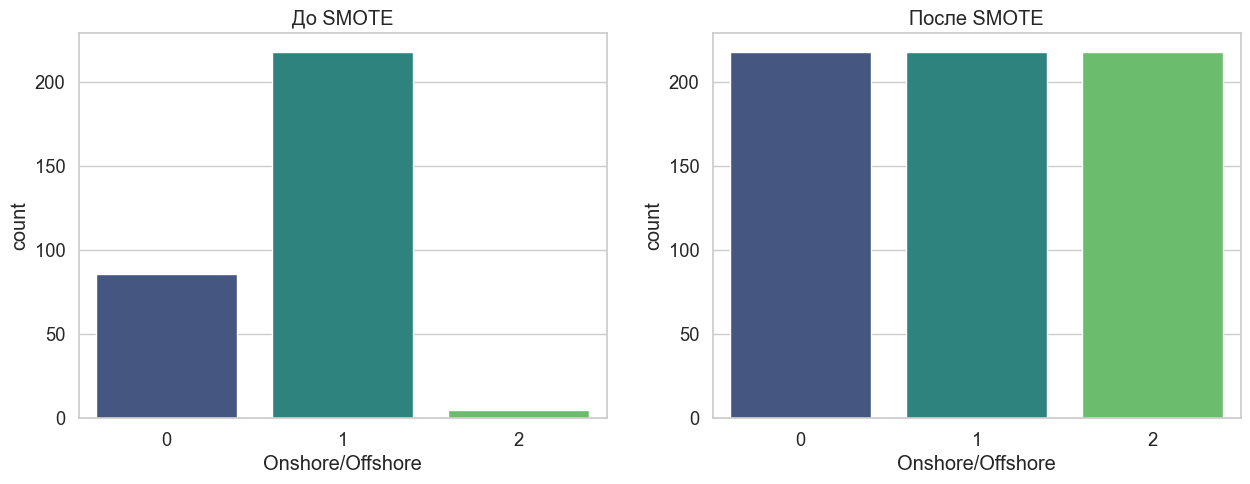


Размеры после SMOTE:
Признаки: (654, 11)
Целевая переменная:
 Onshore/Offshore
1    218
0    218
2    218
Name: count, dtype: int64


In [65]:
# Инициализация SMOTE с безопасными параметрами
smote = SMOTE(
    random_state=42,
    k_neighbors=2  
)

# Применение SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Преобразование обратно в DataFrame (сохраняем названия)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name=y.name)

# Визуализация распределения классов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=y, ax=ax1, palette='viridis')
ax1.set_title('До SMOTE')
sns.countplot(x=y_resampled, ax=ax2, palette='viridis')
ax2.set_title('После SMOTE')
plt.show()

# Вывод информации
print("\nРазмеры после SMOTE:")
print("Признаки:", X_resampled.shape)
print("Целевая переменная:\n", y_resampled.value_counts())

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% данных в тест
    random_state=42,         # Фиксируем для воспроизводимости
    stratify=y               # Стратифицированное разбиение
)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (247, 11), (247,)
Train dataset size: (62, 11), (62,)


Обучим на 3 моделях

In [67]:
# Инициализация моделей (сохраняем исходные параметры)
tree = DecisionTreeClassifier(random_state=42)  # добавил random_state для воспроизводимости
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # добавил random_state

# Обучение моделей
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Предсказания
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Оценка точности (сохраняем исходный вывод)
print(f'Accuracy tree: {accuracy_score(y_test, y_pred_tree):.3f}')
print(f'Accuracy knn: {accuracy_score(y_test, y_pred_knn):.3f}')
print(f'Accuracy rf: {accuracy_score(y_test, y_pred_rf):.3f}')

Accuracy tree: 0.790
Accuracy knn: 0.677
Accuracy rf: 0.871


Используем RandomForest
Улучшим результат изменив n_estimators

In [68]:
for i in range(1, 21):
    estimators = i * 10
    rf_i = RandomForestClassifier(n_estimators=estimators, criterion='gini', random_state=42)
    rf_i.fit(X_train, y_train)
    y_pred_rf_i = rf_i.predict(X_test)
    print(f'Accuracy rf with {estimators} estimators: {accuracy_score(y_test, y_pred_rf_i)}')

Accuracy rf with 10 estimators: 0.8548387096774194
Accuracy rf with 20 estimators: 0.8709677419354839
Accuracy rf with 30 estimators: 0.8870967741935484
Accuracy rf with 40 estimators: 0.8870967741935484
Accuracy rf with 50 estimators: 0.8870967741935484
Accuracy rf with 60 estimators: 0.8709677419354839
Accuracy rf with 70 estimators: 0.8709677419354839
Accuracy rf with 80 estimators: 0.8548387096774194
Accuracy rf with 90 estimators: 0.8548387096774194
Accuracy rf with 100 estimators: 0.8709677419354839
Accuracy rf with 110 estimators: 0.8709677419354839
Accuracy rf with 120 estimators: 0.8709677419354839
Accuracy rf with 130 estimators: 0.8709677419354839
Accuracy rf with 140 estimators: 0.8709677419354839
Accuracy rf with 150 estimators: 0.8709677419354839
Accuracy rf with 160 estimators: 0.8709677419354839
Accuracy rf with 170 estimators: 0.8709677419354839
Accuracy rf with 180 estimators: 0.8709677419354839
Accuracy rf with 190 estimators: 0.8709677419354839
Accuracy rf with 200 

In [69]:
rf = RandomForestClassifier(n_estimators=30, random_state=42)  # добавил random_state
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf):.3f}')

Accuracy Random Forest: 0.887


## загружаем наши данные

In [70]:
y_test_pred = rf.predict(test)
finaldf = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

finaldf.reset_index(inplace=True)
finaldf.to_csv('submition11.csv', index=False)


Результаты :